# Import Packages and load dataset

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from skimage import data, color
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold

%matplotlib inline

In [23]:
imgdir = '../datasets/images'

## Functions

In [37]:
def show_image(image, title='', cmap='gray', silent=True, ax=None):
    
    if not silent:
        print('Shape of {}: {}'.format('image' if title=='' else title, image.shape))
        
    if ax is None:
        ax = plt.gca()
        
    ax.imshow(image, cmap=cmap)   # cmap is ignored for RGB data
    ax.set_title(title)
    ax.axis('off')

# Intro. Image Processing and scikit-image

Shape of Original RGB image: (427, 640, 3)
Shape of Grayscale image: (427, 640)


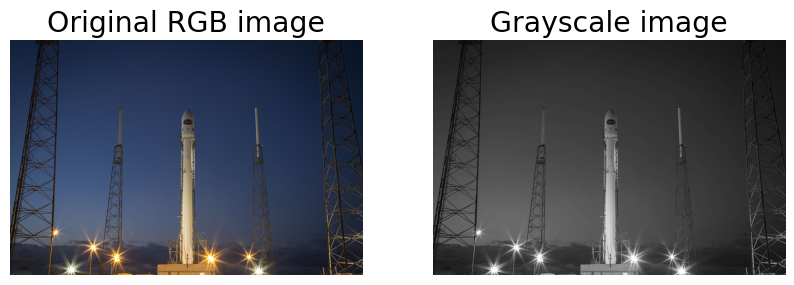

In [38]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

#print('shape of original image: {}'.format(rocket.shape))
#print('shape of gray_scaled image: {}'.format(gray_scaled_rocket.shape))

fig, axes = plt.subplots(1,2, figsize=(10,8))
# Show the original image
show_image(rocket, 'Original RGB image', ax=axes[0], silent=False)

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image', ax=axes[1], silent=False)

## Flipping image 

Shape of image: (267, 400, 3)


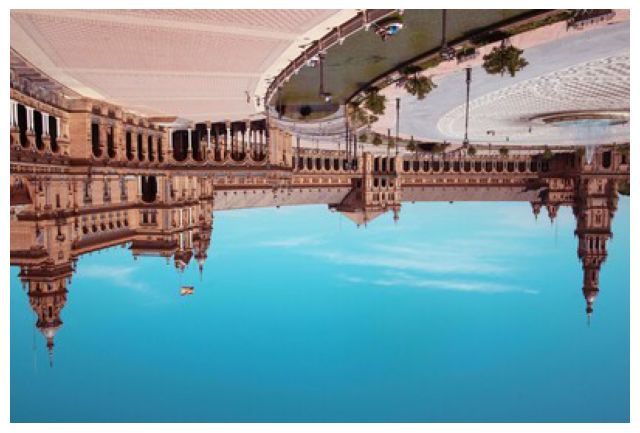

In [40]:
flipped_seville = plt.imread(os.path.join(imgdir,'sevilleup.jpg'))

show_image(flipped_seville, silent=False)

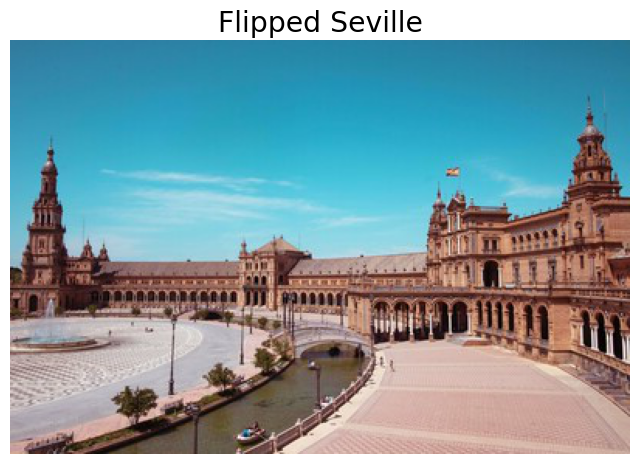

In [29]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Flipped Seville')

## Histograms

Shape of image: (256, 256, 3)


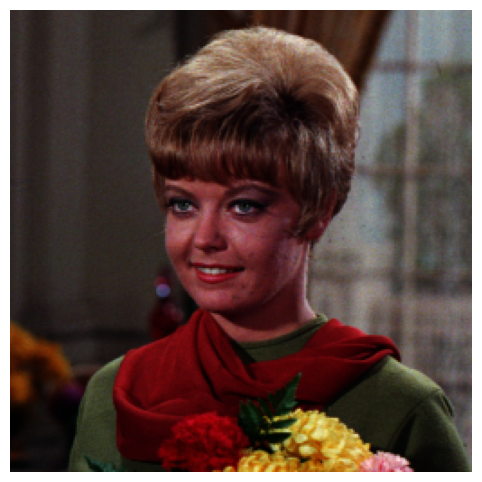

In [41]:
classic_lady = plt.imread(os.path.join(imgdir,'classic_lady.tiff'))

show_image(classic_lady, silent=False)

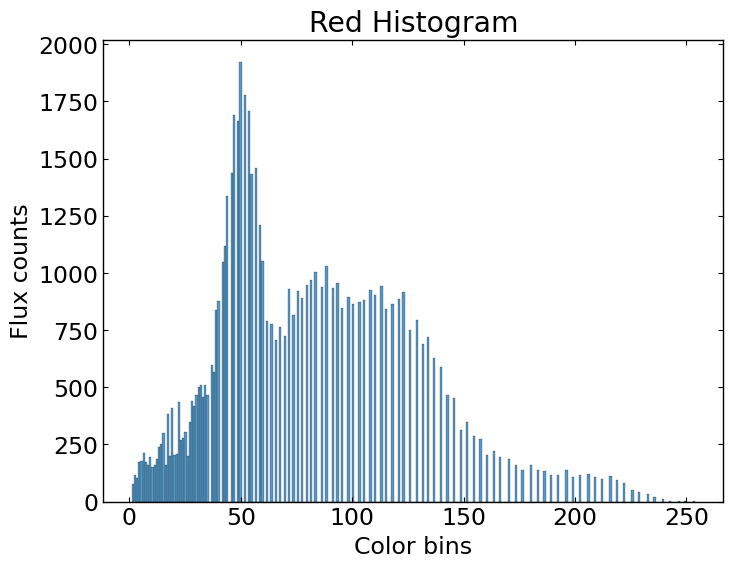

In [47]:
# Obtain the red channel
red_channel = classic_lady[:, :, 0]

# Plot the red histogram with bins in a range of 256
ax = sns.histplot(x=red_channel.ravel(), bins=256)
ax.set_xlabel('Color bins')
ax.set_ylabel('Flux counts')
ax.set_title('Red Histogram');

## Thresholding

Shape of Original: (1271, 1920, 3)


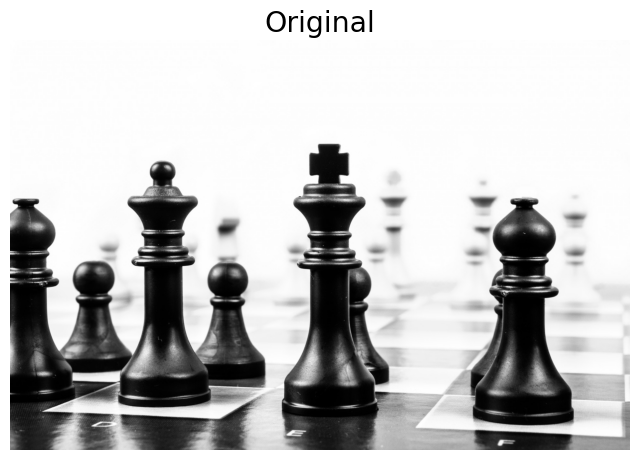

In [52]:
chess_pieces_image = plt.imread(os.path.join(imgdir,'bw.jpg'))

show_image(chess_pieces_image, 'Original', silent=False)

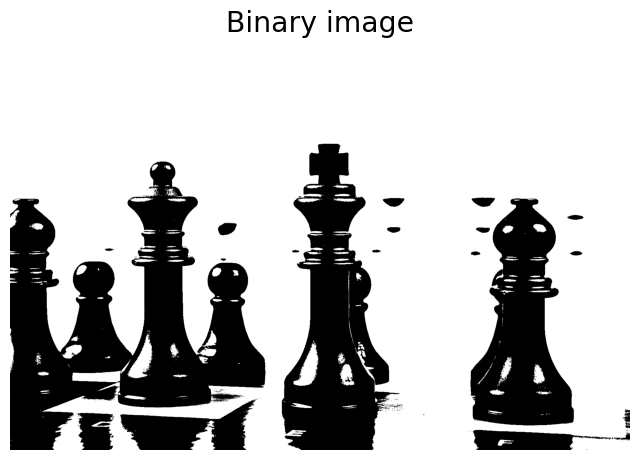

In [53]:
# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

### Global vs. Local

Shape of Original: (228, 612, 3)


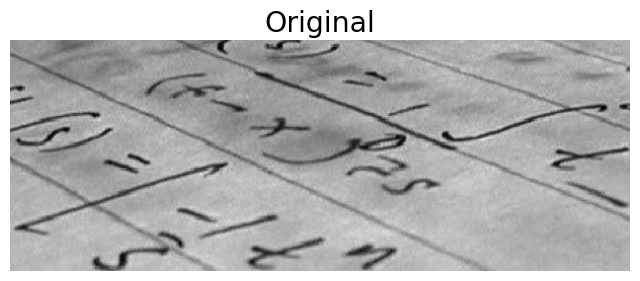

In [59]:
page_image = plt.imread(os.path.join(imgdir,'page_image.jpg'))

show_image(page_image, 'Original', silent=False)

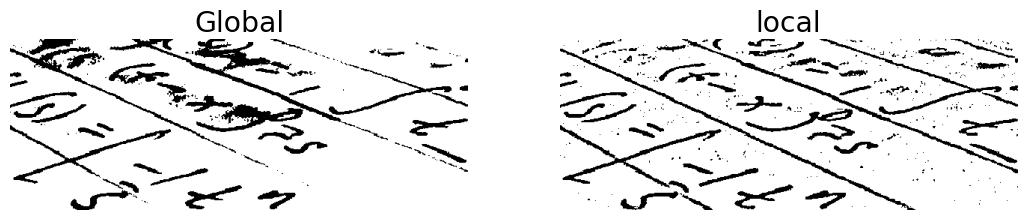

In [83]:
page_image_gray = color.rgb2gray(page_image)

# ======== global ===========
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image_gray)

# Obtain the binary image by applying global thresholding
binary_global = page_image_gray > global_thresh

# ======== local ===========
# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image_gray, block_size, offset=0.04)

# Obtain the binary image by applying local thresholding
binary_local = page_image_gray > local_thresh

fig, axes = plt.subplots(1,2, figsize=(13,8))
# Show the original image
show_image(binary_global, 'Global', ax=axes[0])

# Show the grayscale image
show_image(binary_local, 'local', ax=axes[1])

### show all threshold methods

Shape of Original: (417, 626, 3)


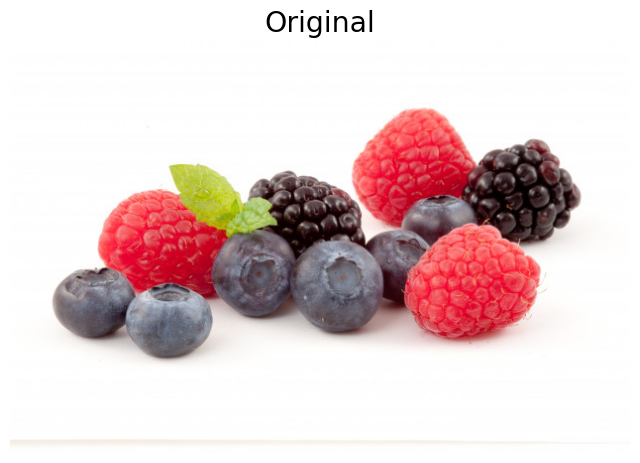

In [87]:
fruits_image = plt.imread(os.path.join(imgdir,'fruits-2.jpg'))

show_image(fruits_image, 'Original', silent=False);

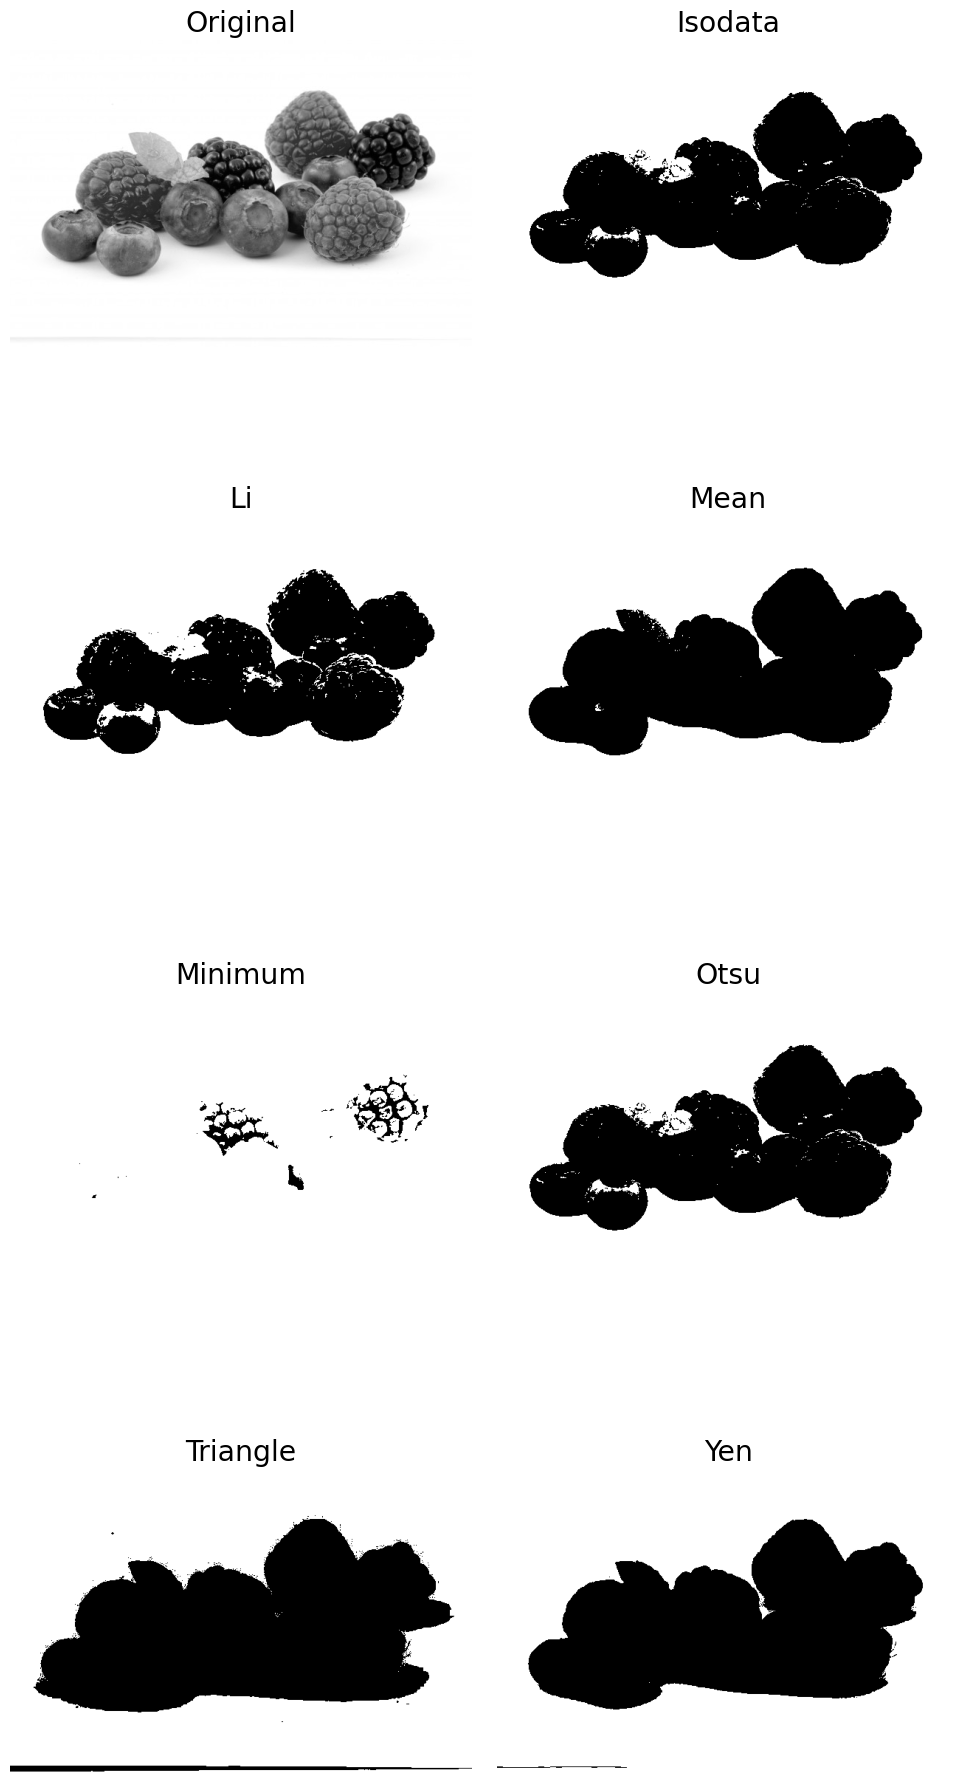

In [89]:
# Turn the fruits_image to grayscale
fruit_grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(fruit_grayscale, verbose=False, figsize=(10,20))

Shape of Original: (417, 626, 3)


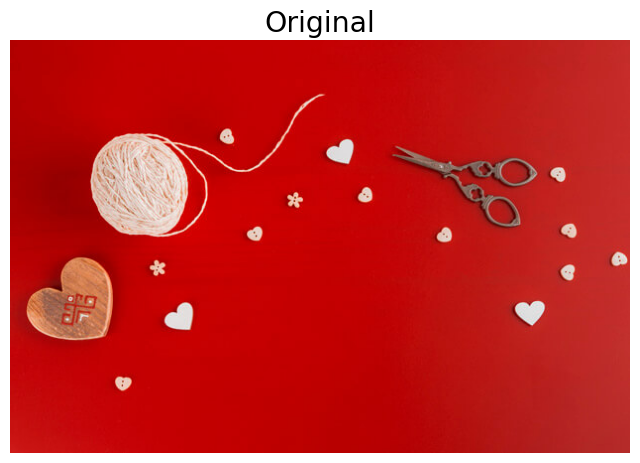

In [91]:
tools_image = plt.imread(os.path.join(imgdir,'shapes52.jpg'))

show_image(tools_image, 'Original', silent=False);

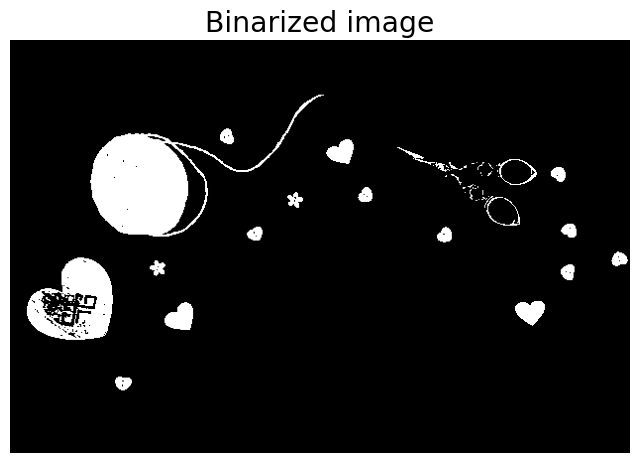

In [93]:
# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

# Filter, Contrast, Transformation and Morphology

# Image restoration, Noise, Segmentation and Contours

# Advanced Operations, Detecting Faces and Features